In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tinycp.regressor import ConformalizedRegressor
from tinycp.plot import plot_prediction_intervals
from sklearn.datasets import fetch_california_housing
import numpy as np

In [2]:
data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, max_depth=int(np.ceil(np.log2(len(X_train)) - 1)))
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, n_jobs=-1, oob_score=True, random_state=42)

In [5]:
reg = ConformalizedRegressor(rf, alpha=0.20)
reg.fit(X=X_calib, y=y_calib)

ConformalizedRegressor(alpha=0.2,
                       learner=RandomForestRegressor(max_depth=13, n_jobs=-1,
                                                     oob_score=True,
                                                     random_state=42))

In [6]:
y_pred_intervals = reg.predict_interval(X_test)
y_pred = reg.predict(X_test)

In [7]:
reg.evaluate(X_test, y_test)

{'total': 4128,
 'alpha': 0.2,
 'coverage_rate': 0.804,
 'interval_width_mean': 1.05,
 'mwis': 1.908,
 'mae': 0.341,
 'mbe': 0.007,
 'mse': 0.269}

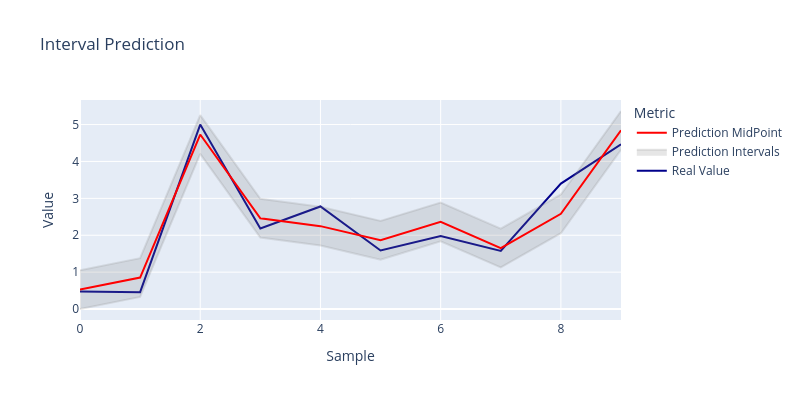

In [8]:
plot_prediction_intervals(y_pred_intervals[:10], y_pred[:10], y_test[:10], fig_type="png")